Jefter Santiago Mares

12559016 

jefter@usp.br

In [80]:
import networkx as nx 
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom 

# 1 - Measures for a random graph

- Mean degree
- 2nd moment of degree distribution
- Average Clustering coefficient

In [52]:
def moment_of_degree_distribution(vk, m):
  n = 0
  for k in vk:
    n += k**m
  return n/len(vk)

In [57]:
N = 1000
p = 0.1
GER = nx.gnp_random_graph(N, p, seed=None, directed=False)
vk = list(dict(GER.degree()).values())

print("Mean degree <k> = ", np.mean(vk))
print("2nd moment of degree distribution = ", moment_of_degree_distribution(vk, 2))
print("Average clustering coefficient = ", nx.average_clustering(GER))

Mean degree <k> =  100.222
2nd moment of degree distribution =  10131.528
Average clustering coefficient =  0.1001647267555389


# 2 - Measures for a Small-World graph 
- Mean degree
- 2nd moment of degree distribution
- Average clustering coefficient

In [253]:
N = 1000
k = 10
p = 0.1
GWS = nx.watts_strogatz_graph(N, k, p, seed=None)

In [254]:
vk = list(dict(GWS.degree()).values())
print("2nd moment of degree distribution = ", moment_of_degree_distribution(vk, 2))
print("Average clustering coefficient = ", nx.average_clustering(GWS))

2nd moment of degree distribution =  101.008
Average clustering coefficient =  0.4791083250083249


# 3 - Entropy of a Erdos-Renyi graph
Calculate the Shannon Entropy for a $G_{n,p}$ graph with $N = 100$ and $⟨ k ⟩ = 5$, $⟨ k ⟩ = 10$ e $⟨ k ⟩ = 50$.

For a Erdos-Renyi graph we have that $\langle k \rangle = (N - 1)p$, so, for 
a given degree $$ p = \frac{\langle k \rangle}{N-1} $$

In [114]:
def ER_fixed_degree(N, k): 
  p = k/(N-1)
  return nx.gnp_random_graph(N, p, seed=None, directed=False)

In [199]:
def degree_distribution(G):
  vk = np.array(list(dict(G.degree()).values()))
  max_vk = np.max(vk)
  min_vk = np.min(min)

  # Creating a distribution 
  kvalues = np.arange(0, max_vk+1)
  Pk = np.zeros(max_vk+1)
  for i in vk:
    Pk[i] += 1
  Pk = Pk/sum(Pk)
  return kvalues, Pk

In [201]:
def plot_degree_distribution(G):
  ks, Pk = degree_distribution(G)

  plt.figure(figsize=(8,6))
  plt.plot(ks,Pk,'bo', label='Data')
  plt.xlabel("k", fontsize=20)
  plt.ylabel("P(k)", fontsize=20)
  plt.title("Degree distribution", fontsize=20)

## Fitting of. binomial distribution
  N = len(G)
  p = np.mean(ks) / (N - 1)
  print(p)
  pk = binom.pmf(ks, N, p)
  print(pk)
  plt.plot(ks, pk, 'r', label='Binomial distribution')
  plt.legend()
  plt.show(True)

In [202]:
def plot_graph(G, title="", node_cl="Black"):
  pos = nx.fruchterman_reingold_layout(G);
  plt.figure(figsize=(8,8));
  plt.axis("off");
  plt.title(title)
  nx.draw_networkx_nodes(G, pos, node_size=450, node_color=node_cl);
  nx.draw_networkx_edges(G, pos, alpha=0.900);
  nx.draw_networkx_labels(G, pos, font_color="White");
  plt.show();

In [203]:
# Shannon Entropy of the degree distribution.
def H(G):
  vk, pk = degree_distribution(G)
  H = 0
  for p in pk:
    if(p>0):
      H -= + p*np.log2(p)
  return H

In [204]:
N = 100
er1 = ER_fixed_degree(N, 5)
er2 = ER_fixed_degree(N, 10)
er3 = ER_fixed_degree(N, 50)

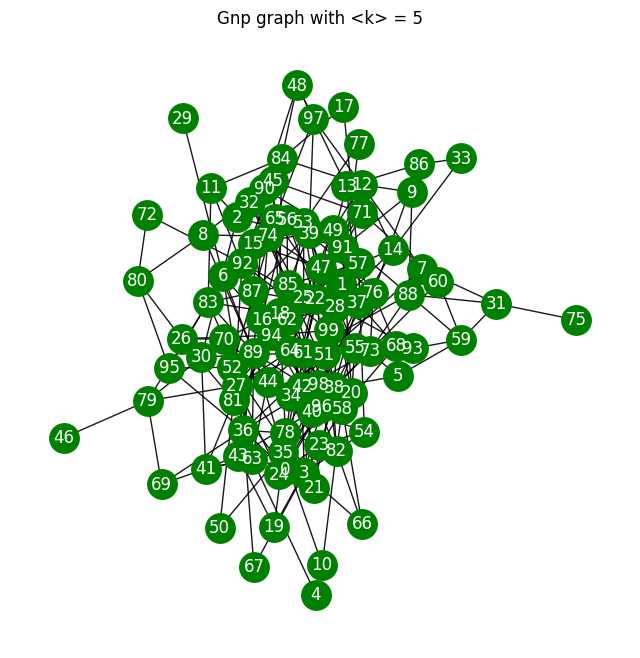

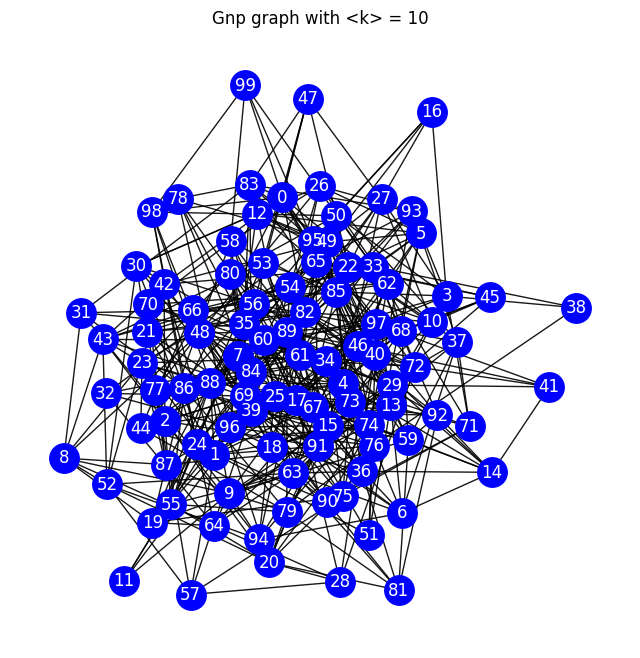

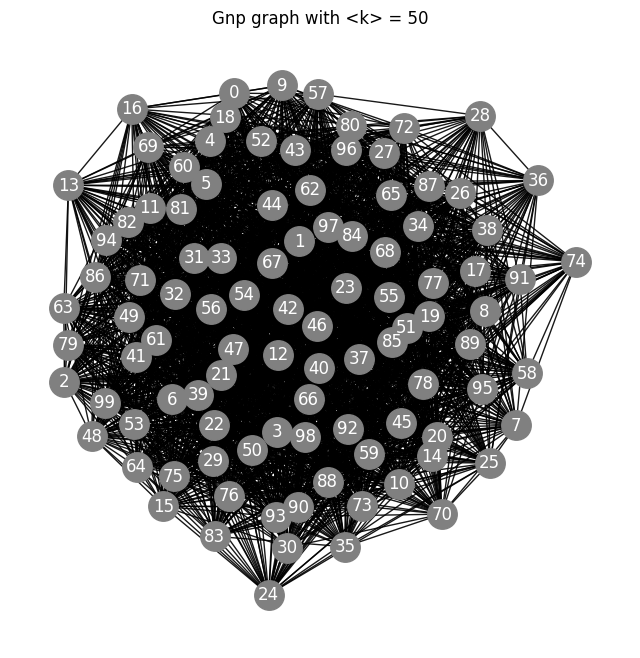

In [205]:
plot_graph(er1, "Gnp graph with <k> = 5", "Green")
plot_graph(er2, "Gnp graph with <k> = 10", "Blue")
plot_graph(er3, "Gnp graph with <k> = 50", "Gray")

0.05555555555555555
[0.00329338 0.01937281 0.05640908 0.10839391 0.15462072 0.17463047
 0.16264602 0.12847669 0.08785538 0.05282807 0.02827856 0.01361   ]


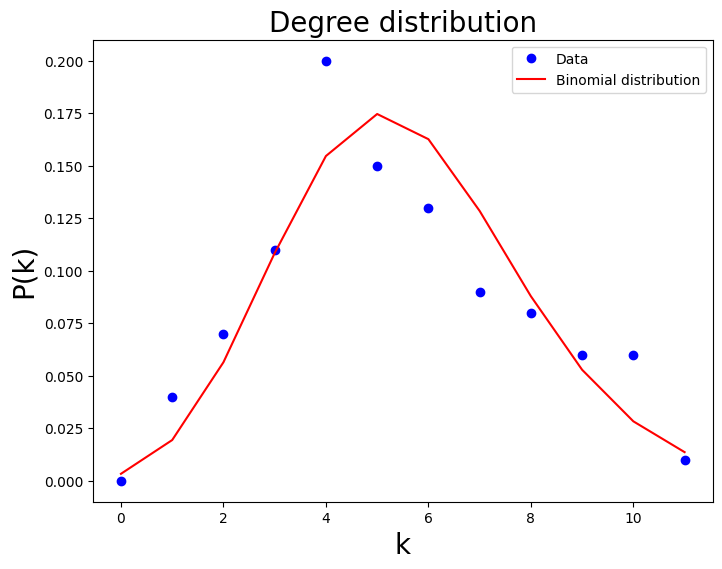

0.08080808080808081
[0.00021909 0.00192605 0.00838151 0.02406997 0.05131401 0.08661353
 0.12056096 0.14232628 0.14545433 0.13071354 0.10457083 0.07521578
 0.04904179 0.02918463 0.01594388 0.00803618 0.00375316]


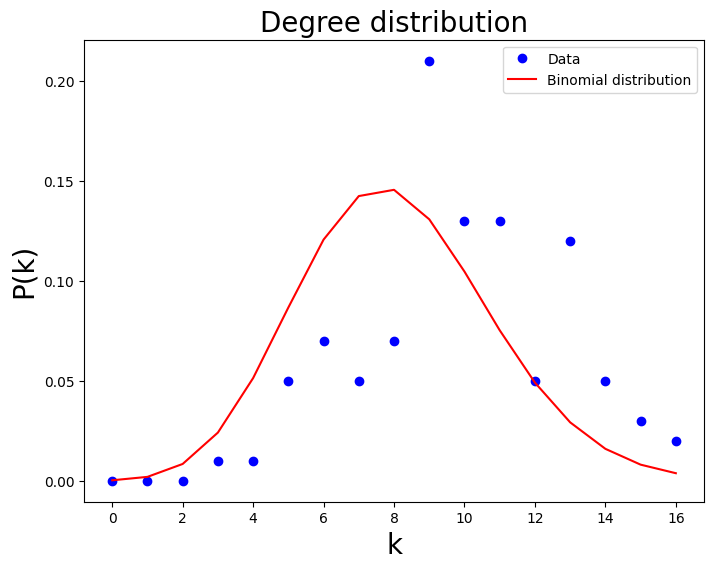

0.3181818181818182
[2.32732923e-17 1.08608697e-15 2.50886091e-14 3.82461907e-13
 4.32819391e-12 3.87806175e-11 2.86545674e-10 1.79568622e-09
 9.74159775e-09 4.64710293e-08 1.97346971e-07 7.53506616e-07
 2.60797012e-06 8.23851074e-06 2.38916812e-05 6.39235202e-05
 1.58477061e-04 3.65429457e-04 7.86350055e-04 1.58373660e-03
 2.99326218e-03 5.32135498e-03 8.91730092e-03 1.41125980e-02
 2.11296953e-02 2.99759944e-02 4.03523002e-02 5.16110901e-02
 6.27934929e-02 7.27538401e-02 8.03525745e-02 8.46726054e-02
 8.52018092e-02 8.19314367e-02 7.53447918e-02 6.63034168e-02
 5.58667678e-02 4.50960576e-02 3.48901078e-02 2.58842851e-02
 1.84209829e-02 1.25801834e-02 8.24700914e-03 5.19114063e-03
 3.13828047e-03 1.82252733e-03 1.01691742e-03 5.45240830e-04
 2.80950483e-04 1.39137382e-04 6.62293940e-05 3.03010299e-05
 1.33246837e-05 5.63156442e-06 2.28738851e-06 8.92774667e-07
 3.34790500e-07 1.20602894e-07 4.17258287e-08 1.38614617e-08
 4.42026613e-09 1.35264975e-09 3.97068151e-10 1.11767331e-10]


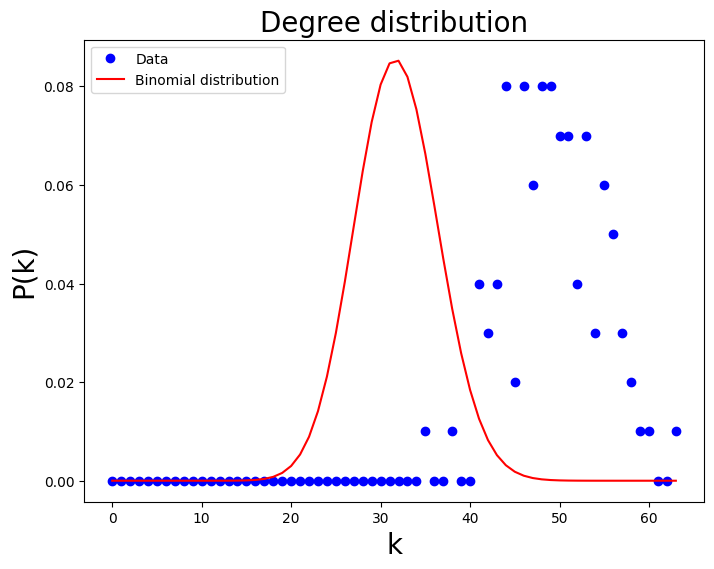

In [206]:
# Ploting the distributions.
plot_degree_distribution(er1)
plot_degree_distribution(er2)
plot_degree_distribution(er3)

We have that $p(N, k) = \frac{k}{(N-1)}$, for each value: 

- $\langle k \rangle = 5  \Rightarrow p \approx 0,05 $
- $\langle k \rangle = 10 \Rightarrow p \approx 0,10 $
- $\langle k \rangle = 50 \Rightarrow p \approx 0,50 $

- [ ] Try to explain the behavior of the distribution from the last graph.
- [ ] Explain what the Shannon Entropy means in this context.

In [207]:
print("For <k> = 5: H(X) = ", H(er1))
print("For <k> = 10: H(X) = ", H(er2))
print("For <k> = 50: H(X) = ", H(er3))

For <k> = 5: H(X) =  3.2198387452871504
For <k> = 10: H(X) =  3.4041955211007906
For <k> = 50: H(X) =  4.245373126246817


# 4 - Average shortest path in a Small-World network with various probabilities $p$ of wiring

The number of vertices is $N = 100$ and the network have a mean degree of $\langle k \rangle = 8$. Calculates the average shortest path for 
$p = 0$, $p = 0.01$, $p = 0.05$ e $p = 0.1$. 

In [267]:
N = 100
k = 8
k = int(k/2)

g1 = nx.watts_strogatz_graph(N, k, 0, seed=None)
g2 = nx.watts_strogatz_graph(N, k, 0.01, seed=None)
g3 = nx.watts_strogatz_graph(N, k, 0.05, seed=None)
g4 = nx.watts_strogatz_graph(N, k, 0.1, seed=None)

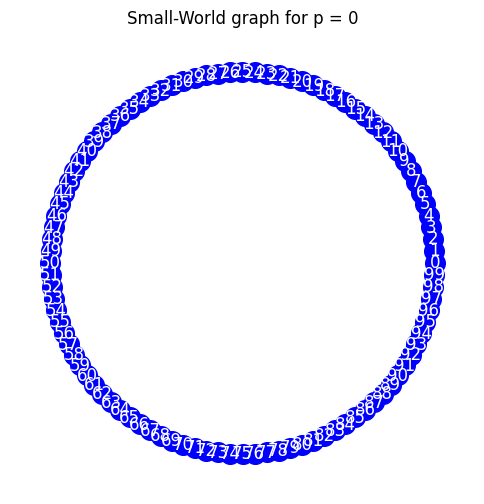

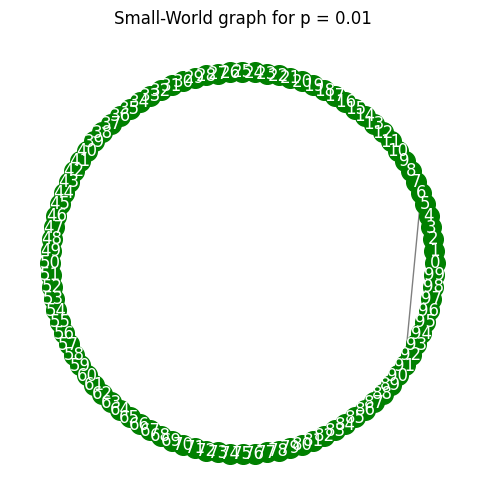

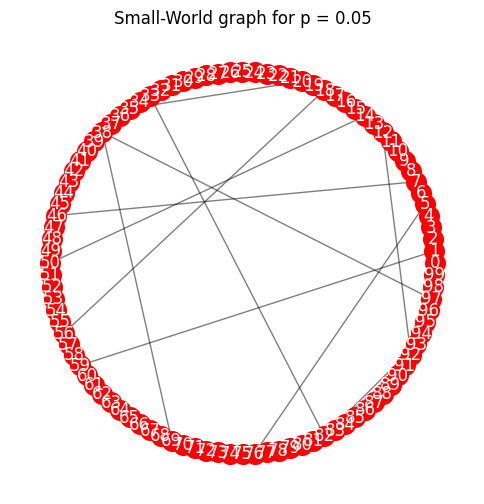

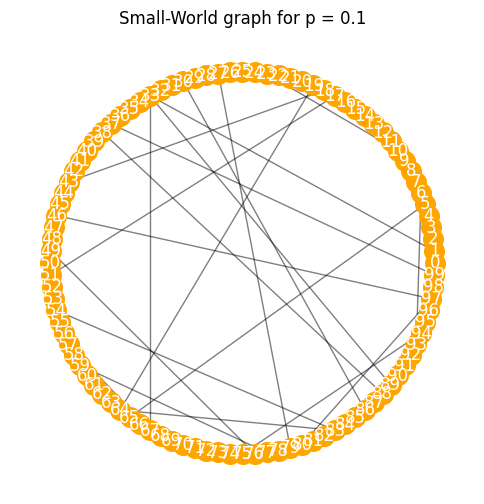

In [268]:
# Plots Small-World graphs 
def plot_gws(GWS, title, node_cl="Black"):
  pos = nx.circular_layout(GWS);
  plt.figure(figsize=(6,6));
  plt.axis("off");
  plt.title("Small-World graph for "+title)
  nx.draw_networkx_nodes(GWS, pos, node_size=200, node_color=node_cl);
  nx.draw_networkx_edges(GWS, pos, alpha=0.500);
  nx.draw_networkx_labels(GWS, pos, font_color="white");
  plt.show();
plot_gws(g1, "p = 0", "Blue")
plot_gws(g2, "p = 0.01", "Green")
plot_gws(g3, "p = 0.05", "Red")
plot_gws(g4, "p = 0.1", "Orange")

In [270]:
print("L(p=0) =", "%3.1f"%nx.average_shortest_path_length(g1))
print("L(p=0.01) =", "%3.1f"%nx.average_shortest_path_length(g2))
print("L(p=0.05) =", "%3.1f"%nx.average_shortest_path_length(g3))
print("L(p=0.1) =", "%3.1f"%nx.average_shortest_path_length(g4))

L(p=0) = 12.9
L(p=0.01) = 11.7
L(p=0.05) = 5.3
L(p=0.1) = 4.6


# 5 - Assortativity of a $G_{n, p}$ with various degrees $\langle k \rangle$
For a Erdos-Renyi graph of degrees $\langle k \rangle = 5$, $\langle k \rangle = 10$, $\langle k \rangle = 50$ with $N = 1000$

In [272]:
N = 1000
er1 = ER_fixed_degree(N, 5)
er2 = ER_fixed_degree(N, 10)
er3 = ER_fixed_degree(N, 50)

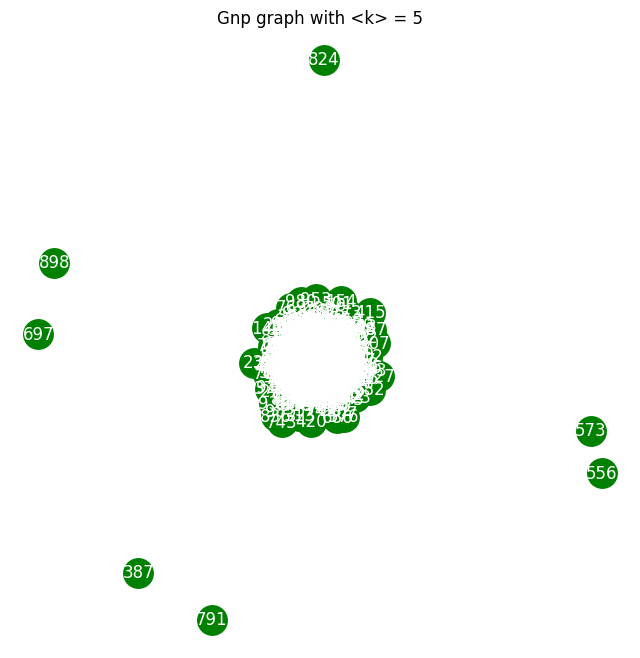

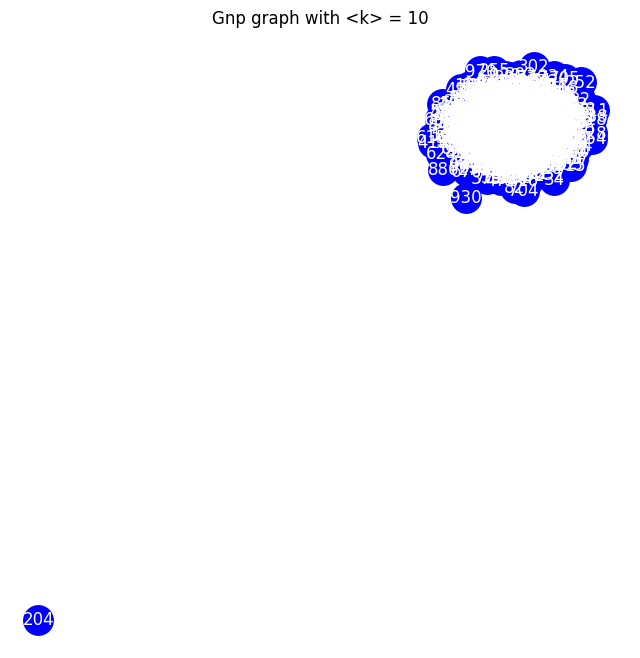

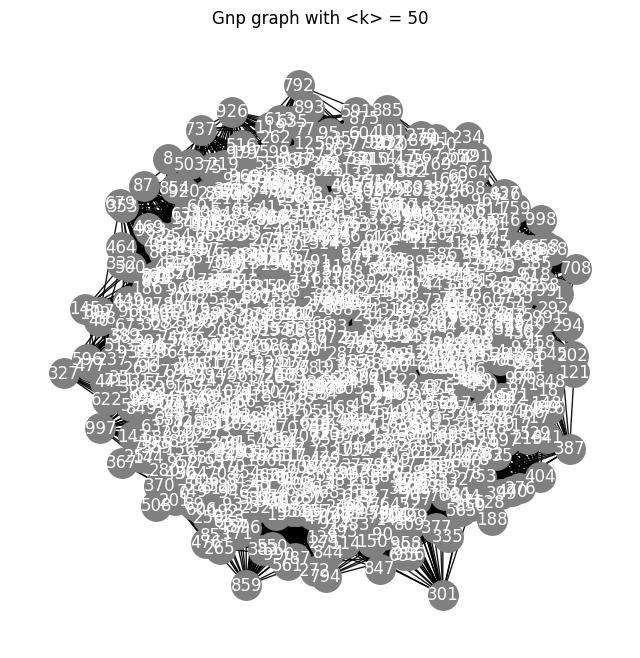

In [273]:
plot_graph(er1, "Gnp graph with <k> = 5", "Green")
plot_graph(er2, "Gnp graph with <k> = 10", "Blue")
plot_graph(er3, "Gnp graph with <k> = 50", "Gray")

In [277]:
def assortativity(g, graph_name):
  r=nx.degree_assortativity_coefficient(g)
  print("Assortativity("+graph_name+") = ","%3.1f"%r)

In [278]:
assortativity(er1, "ER1")
assortativity(er2, "ER2")
assortativity(er3, "ER3")

Assortativity(ER1) =  0.0
Assortativity(ER2) =  0.0
Assortativity(ER3) =  -0.0


# 6 - Assortativity of a Small-World network
With $N = 1000$ and $\langle k \rangle = 10$. Whats the assortativy for 
$p = 0.01$, $ p = 0.005$ and $p=  0.2$ ?

In [288]:
N = 1000
k = 10
k = int(k/2)

g1 = nx.watts_strogatz_graph(N, k, 0.01, seed=None)
g2 = nx.watts_strogatz_graph(N, k, 0.05, seed=None)
g3 = nx.watts_strogatz_graph(N, k, 0.2, seed=None)

In [289]:
assortativity(g1, "GWS1")
assortativity(g2, "GWS2")
assortativity(g3, "GWS3")

Assortativity(GWS1) =  -0.0
Assortativity(GWS2) =  0.0
Assortativity(GWS3) =  0.0
